## SpaceShip Kaggle

In [726]:
import numpy as np
import pandas as pd

In [727]:
df = pd.read_csv('train_SpaceShip.csv')

In [728]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [729]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


### Data Visualizations

In [730]:
import matplotlib.pyplot as plt
import seaborn as sb

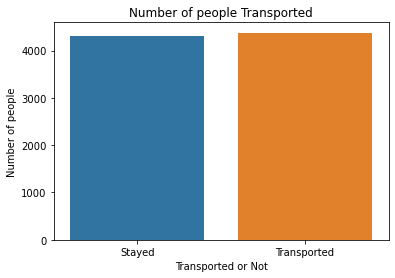

In [731]:
ax = sb.countplot(data=df,x = 'Transported');
plt.title("Number of people Transported")
plt.xlabel("Transported or Not")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Stayed','Transported'])
plt.show()

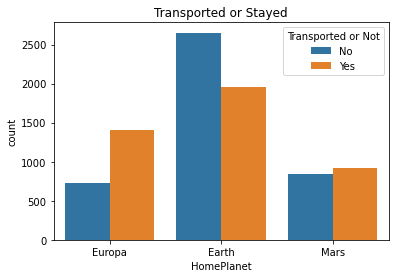

In [732]:
ax = sb.countplot(data=df,x = 'HomePlanet',hue='Transported')
plt.legend(title='Transported or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Transported or Stayed')
plt.show()

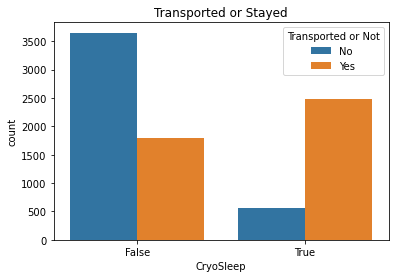

In [733]:
ax = sb.countplot(data=df,x = 'CryoSleep',hue='Transported')
plt.legend(title='Transported or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Transported or Stayed')
plt.show()

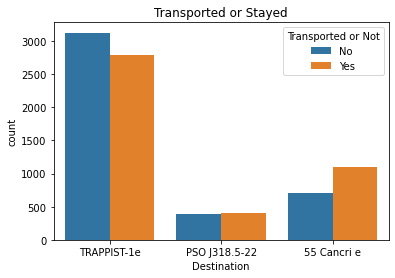

In [734]:
ax = sb.countplot(data=df,x = 'Destination',hue='Transported')
plt.legend(title='Transported or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Transported or Stayed')
plt.show()

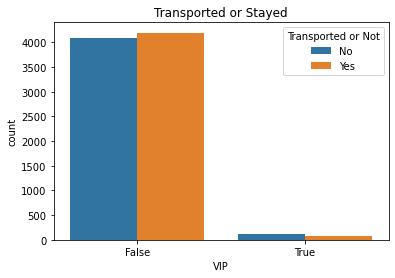

In [735]:
ax = sb.countplot(data=df,x = 'VIP',hue='Transported')
plt.legend(title='Transported or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Transported or Stayed')
plt.show()

### Splitting the data into training and test

In [736]:
X = df.iloc[:,1:12]
y = df.iloc[:,13]

In [737]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

### Cleaning and Imputing missing values

In [738]:
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [739]:
X_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
5776,Mars,True,E/391/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
220,Earth,False,F/50/P,TRAPPIST-1e,43.0,False,NaN,888.0,0.0,0.0,0.0
2398,Earth,False,G/412/S,TRAPPIST-1e,24.0,False,19.0,676.0,0.0,26.0,0.0
5876,Earth,False,F/1191/S,TRAPPIST-1e,16.0,False,0.0,0.0,60.0,0.0,1963.0
192,Earth,False,F/46/P,TRAPPIST-1e,21.0,False,367.0,281.0,0.0,0.0,146.0


***Train Values***

In [740]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(X_train[['HomePlanet','CryoSleep','Cabin','Destination','VIP']])
X_train_imp1 = imputer.transform(X_train[['HomePlanet','CryoSleep','Cabin','Destination','VIP']])

In [741]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(X_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])
X_train_imp2 = imputer.transform(X_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

***Test Values***

In [742]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(X_test[['HomePlanet','CryoSleep','Cabin','Destination','VIP']])
X_test_imp1 = imputer.transform(X_test[['HomePlanet','CryoSleep','Cabin','Destination','VIP']])

In [743]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(X_test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])
X_test_imp2 = imputer.transform(X_test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

***Recombining back to data frames***

In [744]:
X_train_imp1 = pd.DataFrame(X_train_imp1)
X_train_imp1.columns = {'HomePlanet','CryoSleep','Cabin','Destination','VIP'}

X_train_imp2 = pd.DataFrame(X_train_imp2)
X_train_imp2.columns = {'Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'}

X_test_imp1 = pd.DataFrame(X_test_imp1)
X_test_imp1.columns = {'HomePlanet','CryoSleep','Cabin','Destination','VIP'}

X_test_imp2 = pd.DataFrame(X_test_imp2)
X_test_imp2.columns = {'Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'}

In [745]:
X_train_imp1.head()

,HomePlanet,VIP,Cabin,CryoSleep,Destination
0,Mars,True,E/391/P,TRAPPIST-1e,False
1,Earth,False,F/50/P,TRAPPIST-1e,False
2,Earth,False,G/412/S,TRAPPIST-1e,False
3,Earth,False,F/1191/S,TRAPPIST-1e,False
4,Earth,False,F/46/P,TRAPPIST-1e,False


In [746]:
X_train_imp2.head()

,VRDeck,ShoppingMall,Age,Spa,FoodCourt,RoomService
0,39.0,0.0,0.0,0.0,0.0,0.0
1,43.0,0.0,888.0,0.0,0.0,0.0
2,24.0,19.0,676.0,0.0,26.0,0.0
3,16.0,0.0,0.0,60.0,0.0,1963.0
4,21.0,367.0,281.0,0.0,0.0,146.0


In [747]:
X_train_imp2.shape

(6954, 6)

In [748]:
X_train_imp1.shape

(6954, 5)

In [749]:
X_train = pd.concat([X_train_imp1,X_train_imp2],axis=1)

In [750]:
X_test = pd.concat([X_test_imp1,X_test_imp2],axis=1)

In [751]:
X_train.head()

,HomePlanet,VIP,Cabin,CryoSleep,Destination,VRDeck,ShoppingMall,Age,Spa,FoodCourt,RoomService
0,Mars,True,E/391/P,TRAPPIST-1e,False,39.0,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/50/P,TRAPPIST-1e,False,43.0,0.0,888.0,0.0,0.0,0.0
2,Earth,False,G/412/S,TRAPPIST-1e,False,24.0,19.0,676.0,0.0,26.0,0.0
3,Earth,False,F/1191/S,TRAPPIST-1e,False,16.0,0.0,0.0,60.0,0.0,1963.0
4,Earth,False,F/46/P,TRAPPIST-1e,False,21.0,367.0,281.0,0.0,0.0,146.0


### Encoding the values

In [752]:
from sklearn.preprocessing import OrdinalEncoder

***Train Values***

In [753]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)

In [754]:
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.0,1.0,1561.0,2.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3203.0,2.0,0.0,43.0,0.0,616.0,0.0,0.0,0.0
2,0.0,0.0,4710.0,2.0,0.0,24.0,19.0,480.0,0.0,26.0,0.0
3,0.0,0.0,2068.0,2.0,0.0,16.0,0.0,0.0,60.0,0.0,873.0
4,0.0,0.0,3156.0,2.0,0.0,21.0,301.0,247.0,0.0,0.0,140.0


***Test Values***

In [755]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_test)
X_test = ordinal_encoder.transform(X_test)

In [756]:
X_test = pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,5.0,0.0,0.0,32.0,45.0,406.0,0.0,21.0,5.0
1,0.0,1.0,1333.0,1.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,759.0,1.0,0.0,24.0,64.0,218.0,1.0,0.0,0.0
3,0.0,1.0,1194.0,2.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,1051.0,1.0,0.0,32.0,109.0,0.0,182.0,18.0,0.0


In [757]:
from sklearn.preprocessing import LabelEncoder

***Train Values***

In [758]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)

***Test Values***

In [759]:
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
y_test = label_encoder.transform(y_test)

### Scaling the data Values

In [760]:
from sklearn.preprocessing import StandardScaler

***Train Values***

In [761]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [762]:
X_train = pd.DataFrame(X_train)
X_train.columns = {'HomePlanet','VIP','Cabin','CryoSleep','Destination','VRDeck','ShoppingMall','Age','Spa','FoodCourt','RoomService'}

***Test Values***

In [763]:
sc = StandardScaler()
X_test = sc.fit_transform(X_test)

In [764]:
X_test = pd.DataFrame(X_test)
X_test.columns = {'HomePlanet','VIP','Cabin','CryoSleep','Destination','VRDeck','ShoppingMall','Age','Spa','FoodCourt','RoomService'}

### Here we can determine if we want to cut out any columns and keep retesting our models

In [765]:
###

### Finding the best model for this data using gridsearchcv

In [766]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn import model_selection

In [767]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

In [768]:
seed = 7
results = []
names = []
X = X_train
Y = y_train
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=42)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.781278 (0.010852)
KNN: 0.769057 (0.016847)
NB: 0.763162 (0.016295)
SVC: 0.788036 (0.014325)
LSVC: 0.781710 (0.012393)
RFC: 0.783577 (0.015690)
DTR: nan (nan)


### Hypertuning here if needed

In [769]:
###

### Lets Try this with Artifical Neural Networks

In [770]:
import tensorflow as tf

In [771]:
ann = tf.keras.models.Sequential()

In [772]:
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

In [773]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [774]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [775]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["accuracy"])

In [776]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
218/218 [==============================] - 1s 962us/step - loss: 0.6128 - accuracy: 0.6729
Epoch 2/100
218/218 [==============================] - 0s 880us/step - loss: 0.4966 - accuracy: 0.7597
Epoch 3/100
218/218 [==============================] - 0s 913us/step - loss: 0.4674 - accuracy: 0.7744
Epoch 4/100
218/218 [==============================] - 0s 910us/step - loss: 0.4597 - accuracy: 0.7800
Epoch 5/100
218/218 [==============================] - 0s 862us/step - loss: 0.4560 - accuracy: 0.7829
Epoch 6/100
218/218 [==============================] - 0s 848us/step - loss: 0.4539 - accuracy: 0.7860
Epoch 7/100
218/218 [==============================] - 0s 841us/step - loss: 0.4519 - accuracy: 0.7863
Epoch 8/100
218/218 [==============================] - 0s 846us/step - loss: 0.4506 - accuracy: 0.7882
Epoch 9/100
218/218 [==============================] - 0s 841us/step - loss: 0.4492 - accuracy: 0.7879
Epoch 10/100
218/218 [==============================] - 0s 875us/step - l

### We will use ANN since it had the highest accruacy

In [777]:
pred = ann.predict(X_test)
pred = (pred > 0.5)
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

55/55 [==============================] - 0s 691us/step
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       843
           1       0.78      0.83      0.80       896

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



### We will try this with a pipeline

In [778]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [779]:
numeric_features = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),("encoder", OrdinalEncoder(handle_unknown='ignore')) ,("scaler", StandardScaler()),]
)

categorical_features = ["HomePlanet","CryoSleep","Cabin","Destination","VIP"]
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),("encoder", OrdinalEncoder(handle_unknown='ignore')) ,("scaler", StandardScaler()),]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", cat_transformer, categorical_features),
    ]
)
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC())]
)

In [780]:
df = pd.read_csv('train_SpaceShip.csv')

In [781]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [782]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [783]:
X = df.iloc[:,1:13]
y = df.iloc[:,13]

In [784]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=104)

In [785]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)

In [786]:
X_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4727,Earth,False,G/826/S,TRAPPIST-1e,23.0,False,0.0,381.0,142.0,0.0,261.0,Sanya Palmes
3491,Earth,False,NaN,TRAPPIST-1e,24.0,False,0.0,274.0,594.0,35.0,658.0,Ambert Ericksonga
4126,Earth,True,G/725/P,PSO J318.5-22,29.0,False,0.0,0.0,0.0,0.0,0.0,Louisy Waderoachez
2827,Europa,False,E/191/P,TRAPPIST-1e,25.0,False,1586.0,2342.0,947.0,1.0,276.0,Skatik Supred
7236,Earth,False,F/1609/P,TRAPPIST-1e,22.0,False,60.0,48.0,0.0,0.0,500.0,Herita Brookenson


In [787]:
myModel = clf.fit(X_train, y_train)

In [788]:
myModel

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='ignore')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                    

In [789]:
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.656


### Lets Load the actual test Data

In [790]:
test = pd.read_csv('test_SpaceShip.csv')

In [791]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [792]:
test = test.iloc[:,1:-1]

In [793]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [794]:
np.sum(test.isna())

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

### Cleaning and Imputing the data

In [795]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(test[['HomePlanet','CryoSleep','Cabin','Destination','VIP']])
test_1 = imputer.transform(test[['HomePlanet','CryoSleep','Cabin','Destination','VIP']])

In [796]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])
test_2 = imputer.transform(test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [797]:
test_1 = pd.DataFrame(test_1)
test_1.columns = {'HomePlanet','CryoSleep','Cabin','Destination','VIP'}

test_2 = pd.DataFrame(test_2)
test_2.columns = {'Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'}

In [798]:
test= pd.concat([test_1,test_2],axis=1)

In [799]:
test.head()

,HomePlanet,VIP,Cabin,CryoSleep,Destination,VRDeck,ShoppingMall,Age,Spa,FoodCourt,RoomService
0,Earth,True,G/3/S,TRAPPIST-1e,False,27.0,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,False,19.0,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,False,31.0,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,False,38.0,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,False,20.0,10.0,0.0,635.0,0.0,0.0


In [800]:
np.sum(test.isna())

HomePlanet      0
VIP             0
Cabin           0
CryoSleep       0
Destination     0
VRDeck          0
ShoppingMall    0
Age             0
Spa             0
FoodCourt       0
RoomService     0
dtype: int64

### Encoding 

In [801]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(test)
test = ordinal_encoder.transform(test)

### Scaling

In [802]:
sc = StandardScaler()
test = sc.fit_transform(test)

In [803]:
test = pd.DataFrame(test)
test.columns = {'HomePlanet','VIP','Cabin','CryoSleep','Destination','VRDeck','ShoppingMall','Age','Spa','FoodCourt','RoomService'}

In [804]:
test.head()

,VRDeck,ShoppingMall,Age,HomePlanet,VIP,Cabin,Spa,FoodCourt,CryoSleep,RoomService,Destination
0,-0.824107,1.330443,1.193156,0.603563,-0.132689,-0.114107,-0.484097,-0.492089,-0.461530,-0.480342,-0.465223
1,-0.824107,-0.751630,0.269885,0.603563,-0.132689,-0.684406,-0.484097,-0.452039,-0.461530,3.120782,-0.465223
2,0.411765,1.330443,-1.351125,-1.890580,-0.132689,0.171043,-0.484097,-0.492089,-0.461530,-0.480342,-0.465223
3,0.411765,-0.751630,-1.349111,0.603563,-0.132689,0.670056,-0.484097,3.259271,-0.461530,0.290617,1.434984
4,-0.824107,-0.751630,0.343384,0.603563,-0.132689,-0.613119,-0.435679,-0.492089,1.735974,-0.480342,-0.465223


In [805]:
pred = ann.predict(test)
pred = (pred > 0.5)

134/134 [==============================] - 0s 635us/step


In [806]:
pred

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [807]:
test = pd.read_csv('test_SpaceShip.csv')

In [808]:
col = np.array(test.iloc[:,0])

In [809]:
col

array(['0013_01', '0018_01', '0019_01', ..., '9271_01', '9273_01',
       '9277_01'], dtype=object)

In [810]:
pred = np.array(pred)

In [811]:
pred

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [812]:
pred.shape

(4277, 1)

In [813]:
col.shape

(4277,)

In [814]:
col= np.array(col).reshape(-1,1)

In [815]:
col.shape

(4277, 1)

In [816]:
col = pd.DataFrame(col)
col.columns = ['PassengerId']
pred = pd.DataFrame(pred)
pred.columns = ['Transported']

In [817]:
col.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [818]:
sub = pd.concat([col,pred],axis=1)

In [819]:
sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [820]:
sub.to_csv('SpaceShip_predictions.csv', index=False)